In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install xgboost
#!pip install gradio

#!pip install gradio --upgrade




In [2]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [7]:
df.shape

(100000, 9)

In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [10]:
diabetes_count_by_gender = df.groupby(['gender', 'diabetes']).size().reset_index(name='count')

In [11]:
print(diabetes_count_by_gender)

   gender  diabetes  count
0  Female         0  54091
1  Female         1   4461
2    Male         0  37391
3    Male         1   4039
4   Other         0     18


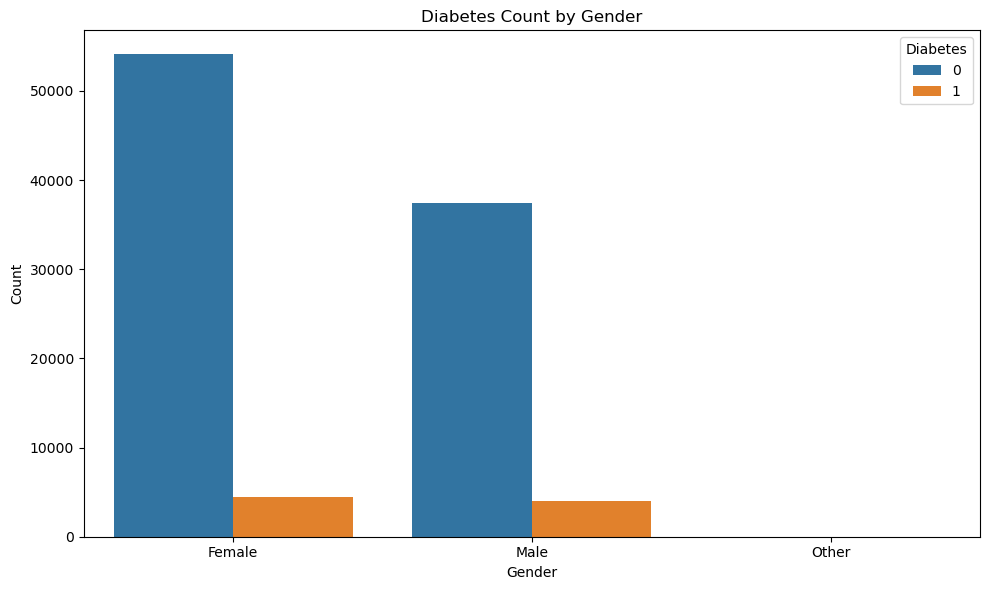

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=diabetes_count_by_gender, x='gender', y='count', hue='diabetes')
plt.title('Diabetes Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes', loc='upper right')
plt.tight_layout()
plt.show()

In [13]:
diabetes_patients = df[df['diabetes'] == 1]


diabetes_count_by_gender = diabetes_patients.groupby('gender').size().reset_index(name='count')

print(diabetes_count_by_gender)

   gender  count
0  Female   4461
1    Male   4039


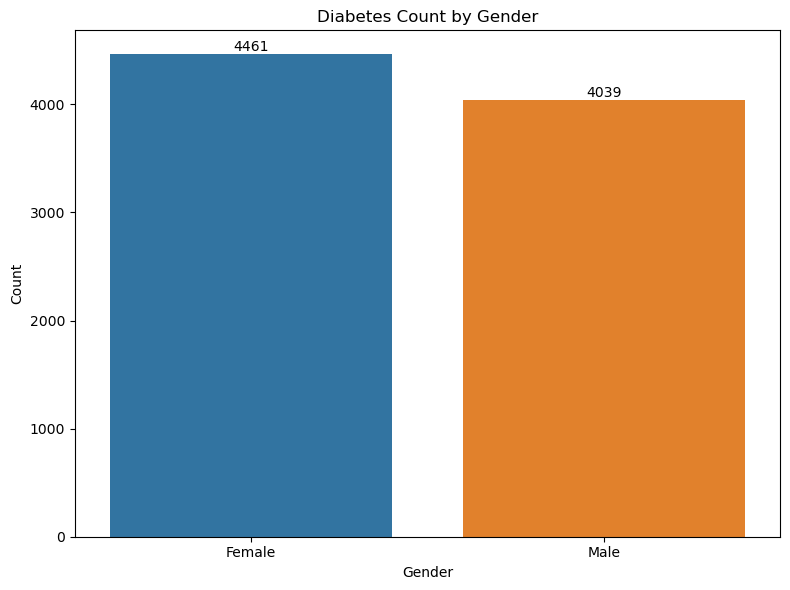

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(data=diabetes_count_by_gender, x='gender', y='count')
plt.title('Diabetes Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

for index, row in diabetes_count_by_gender.iterrows():
    plt.text(index, row['count'], str(row['count']), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [15]:
gender_distribution = df['gender'].value_counts()
print(gender_distribution)

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


In [16]:
smoking_history_distribution = df['smoking_history'].value_counts()
print(smoking_history_distribution)

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [17]:
diabetes_prevalence_by_gender = df.groupby('gender')['diabetes'].mean()
print(diabetes_prevalence_by_gender)

gender
Female    0.076189
Male      0.097490
Other     0.000000
Name: diabetes, dtype: float64


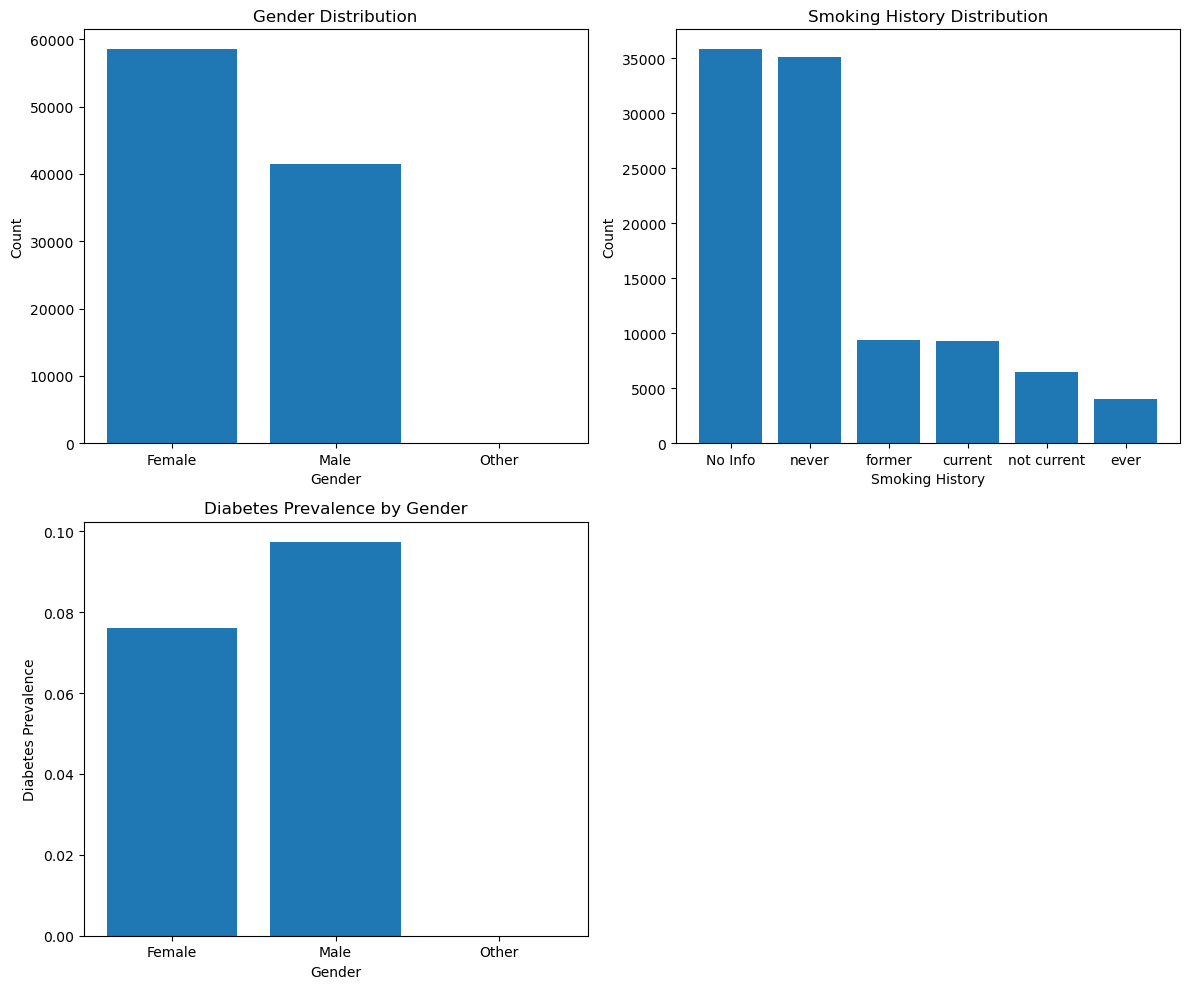

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))


axes[0, 0].bar(gender_distribution.index, gender_distribution.values)
axes[0, 0].set_title('Gender Distribution')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')


axes[0, 1].bar(smoking_history_distribution.index, smoking_history_distribution.values)
axes[0, 1].set_title('Smoking History Distribution')
axes[0, 1].set_xlabel('Smoking History')
axes[0, 1].set_ylabel('Count')


axes[1, 0].bar(diabetes_prevalence_by_gender.index, diabetes_prevalence_by_gender.values)
axes[1, 0].set_title('Diabetes Prevalence by Gender')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Diabetes Prevalence')

# Hide the empty subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [19]:
smoking_history_by_gender = df.groupby('gender')['smoking_history'].value_counts()
print(smoking_history_by_gender)


gender  smoking_history
Female  never              22869
        No Info            19700
        current             5058
        former              4774
        not current         3913
        ever                2238
Male    No Info            16110
        never              12223
        former              4578
        current             4228
        not current         2526
        ever                1765
Other   not current            8
        No Info                6
        never                  3
        ever                   1
Name: count, dtype: int64


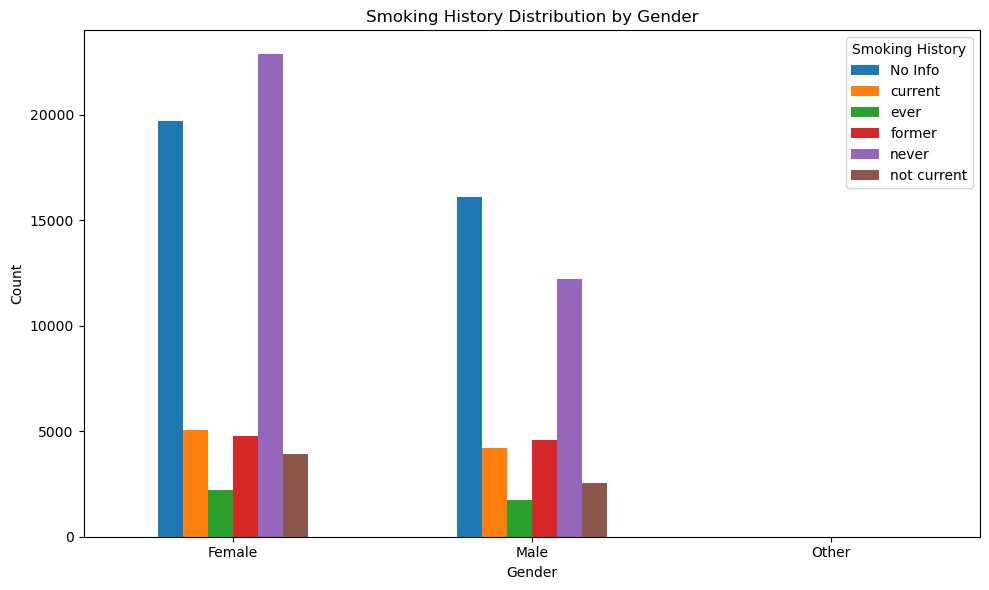

In [20]:
smoking_history_by_gender = df.groupby(['gender', 'smoking_history']).size().unstack()


smoking_history_by_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Smoking History Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.legend(title='Smoking History')
plt.tight_layout()
plt.show()

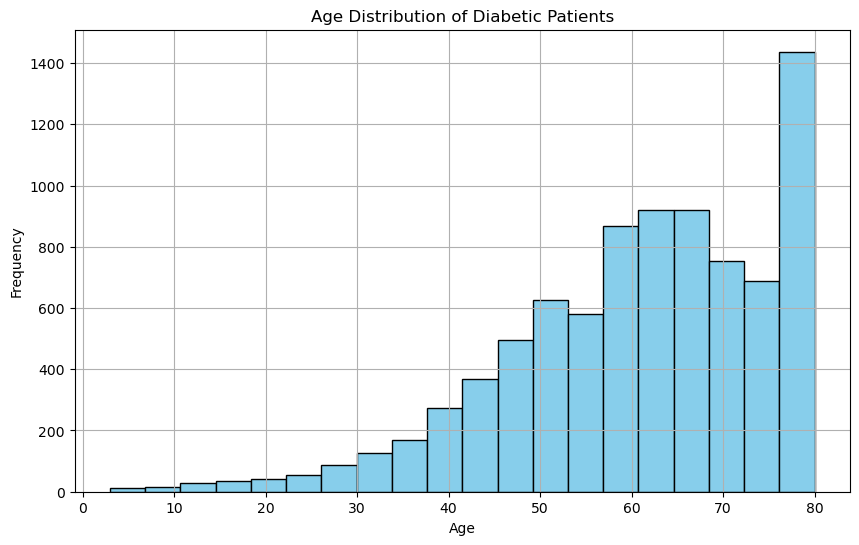

In [21]:
diabetic_patients = df[df['diabetes'] == 1]


plt.figure(figsize=(10, 6))
plt.hist(diabetic_patients['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Diabetic Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
male_data = df[df['gender'] == 'Male']
female_data = df[df['gender'] == 'Female']
other_data = df[df['gender'] == 'Other']


male_diabetes_prevalence_by_age = male_data.groupby('age')['diabetes'].mean()
female_diabetes_prevalence_by_age = female_data.groupby('age')['diabetes'].mean()
other_diabetes_prevalence_by_age = other_data.groupby('age')['diabetes'].mean()



In [23]:
print(male_diabetes_prevalence_by_age)

age
0.08     0.000000
0.16     0.000000
0.24     0.000000
0.32     0.000000
0.40     0.000000
           ...   
76.00    0.199387
77.00    0.240678
78.00    0.232323
79.00    0.256604
80.00    0.198296
Name: diabetes, Length: 102, dtype: float64


In [24]:
print(female_diabetes_prevalence_by_age)

age
0.08     0.000000
0.16     0.000000
0.24     0.000000
0.32     0.000000
0.40     0.000000
           ...   
76.00    0.206388
77.00    0.149425
78.00    0.174026
79.00    0.205056
80.00    0.172463
Name: diabetes, Length: 102, dtype: float64


In [25]:
print(other_diabetes_prevalence_by_age)

age
7.0     0.0
10.0    0.0
18.0    0.0
19.0    0.0
23.0    0.0
24.0    0.0
26.0    0.0
28.0    0.0
39.0    0.0
45.0    0.0
47.0    0.0
52.0    0.0
53.0    0.0
55.0    0.0
Name: diabetes, dtype: float64


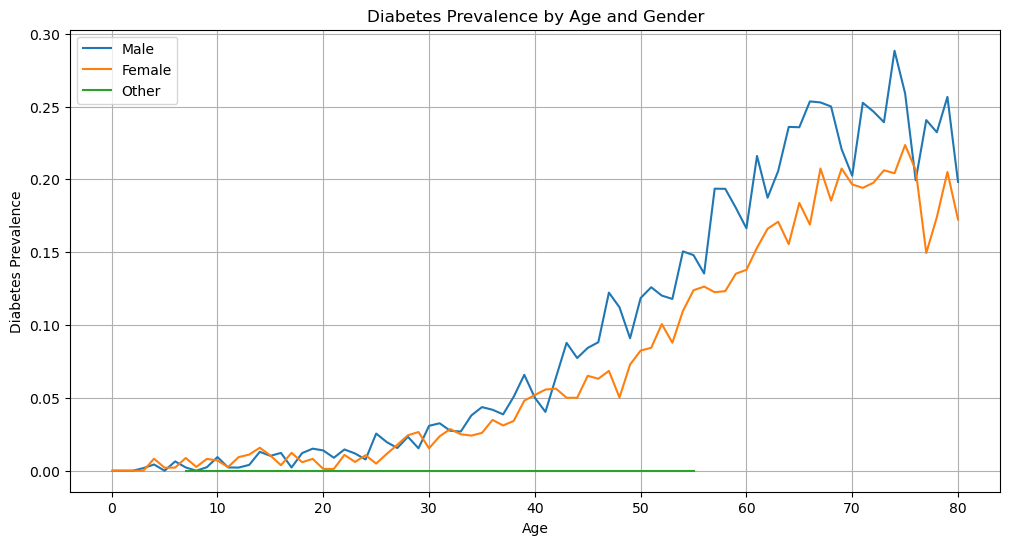

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(male_diabetes_prevalence_by_age.index, male_diabetes_prevalence_by_age.values, label='Male')
plt.plot(female_diabetes_prevalence_by_age.index, female_diabetes_prevalence_by_age.values, label='Female')
plt.plot(other_diabetes_prevalence_by_age.index, other_diabetes_prevalence_by_age.values, label='Other')
plt.title('Diabetes Prevalence by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Diabetes Prevalence')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
age_mean = diabetic_patients['age'].mean()
age_median = diabetic_patients['age'].median()
age_mode = diabetic_patients['age'].mode().values[0] 

print("Summary Statistics for Ages of Diabetic Patients:")
print("Mean age:", age_mean)
print("Median age:", age_median)
print("Mode age:", age_mode)

Summary Statistics for Ages of Diabetic Patients:
Mean age: 60.946588235294115
Median age: 62.0
Mode age: 80.0


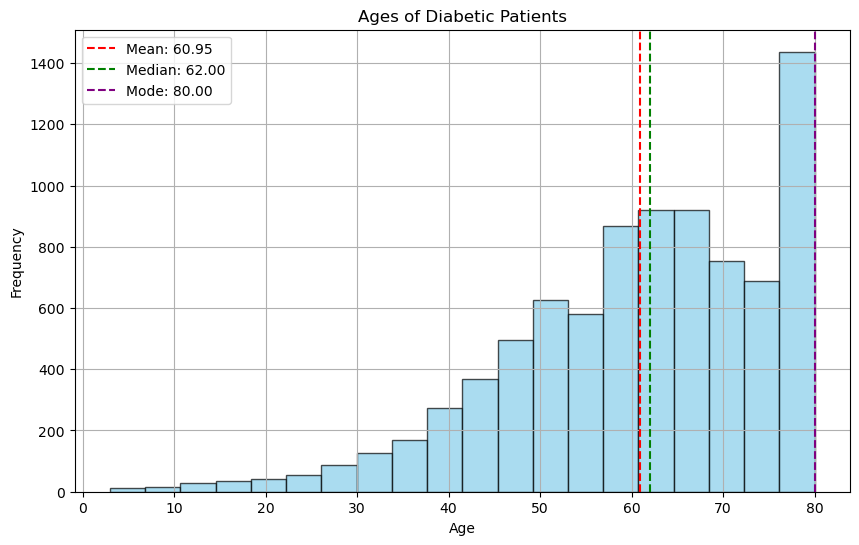

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(diabetic_patients['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)


plt.axvline(x=age_mean, color='red', linestyle='--', label=f'Mean: {age_mean:.2f}')
plt.axvline(x=age_median, color='green', linestyle='--', label=f'Median: {age_median:.2f}')
plt.axvline(x=age_mode, color='purple', linestyle='--', label=f'Mode: {age_mode:.2f}')

plt.title('Ages of Diabetic Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
X = df.drop('diabetes',axis=1)
y = df['diabetes']

In [30]:
y.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

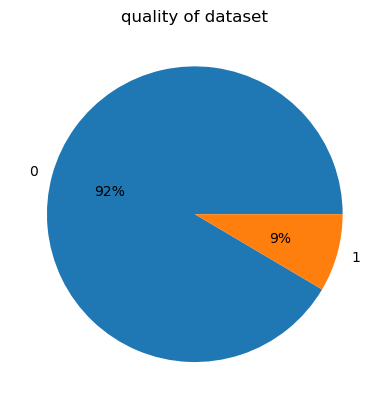

In [31]:
target_var=pd.crosstab(index=y,columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('quality of dataset')
plt.show()

In [32]:
from imblearn.under_sampling import RandomUnderSampler  
under_sampler = RandomUnderSampler()
x_res, y_res = under_sampler.fit_resample(X, y)

In [33]:
y_res.value_counts()

diabetes
0    8500
1    8500
Name: count, dtype: int64

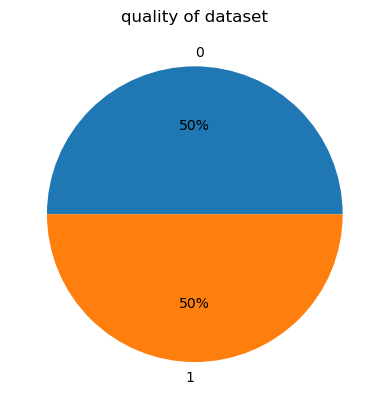

In [34]:
target_var=pd.crosstab(index=y_res,columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('quality of dataset')
plt.show()

In [35]:
X_encoded = pd.get_dummies(x_res, columns=['gender', 'smoking_history'], drop_first=True)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y_res,test_size=0.2,random_state=0)

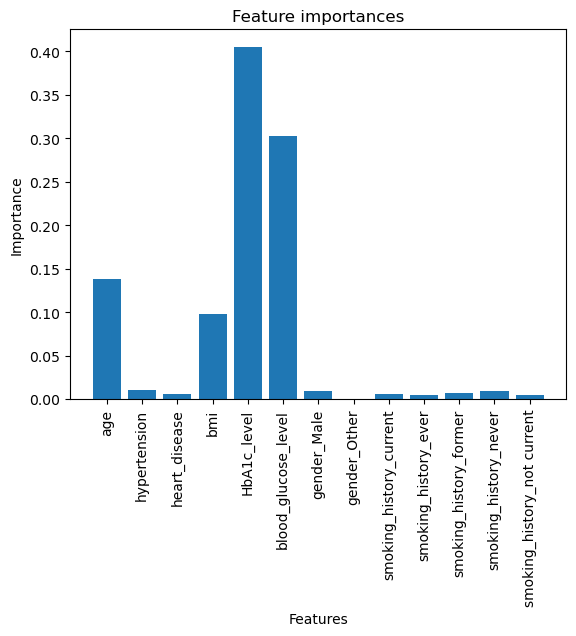

In [37]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)
importances = model.feature_importances_

plt.bar(X_train.columns, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature importances')
plt.show()


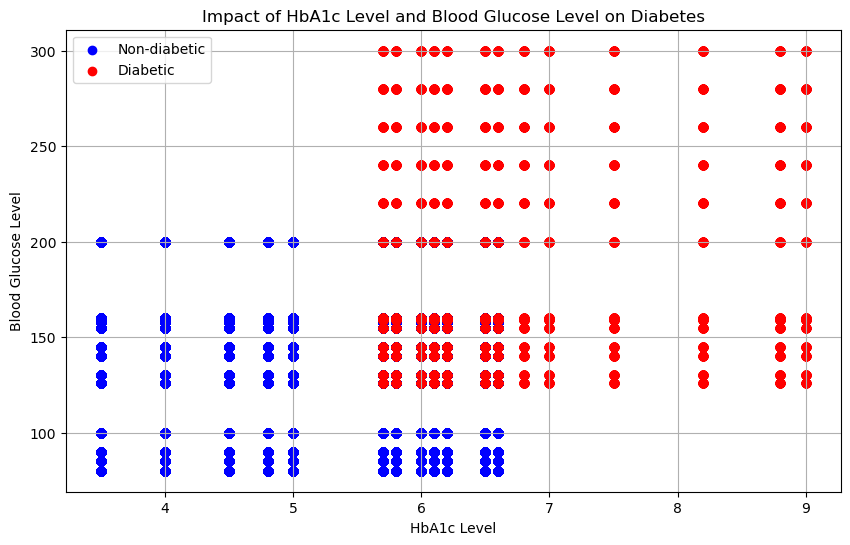

In [38]:
import matplotlib.pyplot as plt


diabetes_data_subset = df[['HbA1c_level', 'blood_glucose_level', 'diabetes']]

diabetic_patients = diabetes_data_subset[diabetes_data_subset['diabetes'] == 1]
non_diabetic_patients = diabetes_data_subset[diabetes_data_subset['diabetes'] == 0]


plt.figure(figsize=(10, 6))
plt.scatter(non_diabetic_patients['HbA1c_level'], non_diabetic_patients['blood_glucose_level'], color='blue', label='Non-diabetic')
plt.scatter(diabetic_patients['HbA1c_level'], diabetic_patients['blood_glucose_level'], color='red', label='Diabetic')
plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.title('Impact of HbA1c Level and Blood Glucose Level on Diabetes')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50, 100, 200],
          'max_depth': [3, 5, 10],
          'learning_rate': [0.01, 0.1, 0.3],
          'subsample': [0.5, 0.7, 1.0],
          'colsample_bytree': [0.5, 0.7, 1.0]}
model = XGBClassifier(scale_pos_weight=sum(y_train==0)/sum(y_train==1), seed=100)

grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best hyperparameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}
Best accuracy score:  0.9145588235294116


In [40]:
from xgboost import XGBClassifier

# Instantiate XGBoost classifier with the best hyperparameters
best_params = {'colsample_bytree': 0.5,
               'learning_rate': 0.1,
               'max_depth': 3,
               'n_estimators': 50,
               'subsample': 0.5}

model = XGBClassifier(**best_params, scale_pos_weight=sum(y_train==0)/sum(y_train==1), seed=100)

# Train the model on the entire training dataset
model.fit(X_train, y_train)

# Now the model is trained and ready for predictions


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred = model.predict(X_train)

# Calculate mean squared error
mse = mean_squared_error(y_train, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.09176470588235294
Root Mean Squared Error (RMSE): 0.3029268985784408


In [42]:
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_train, y_pred)

print("R-squared:", r_squared)


R-squared: 0.6329403826565368


C:\Users\aswin\AppData\Local\Temp\ipykernel_8668\4240290696.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train, label='Actual', shade=True)
C:\Users\aswin\AppData\Local\Temp\ipykernel_8668\4240290696.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Predicted', shade=True)


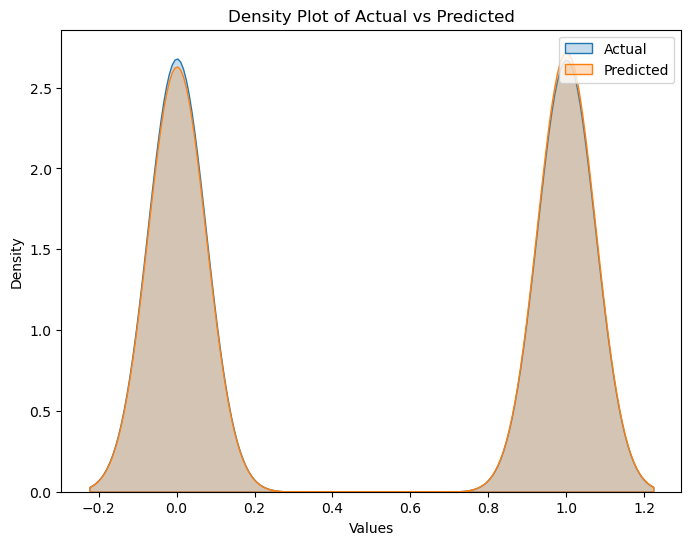

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.kdeplot(y_train, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs Predicted')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import gradio as gr
from joblib import load
from sklearn.preprocessing import LabelEncoder

# Load the model and data
model = load('XGBoost.pkl')
df = pd.read_csv("diabetes_prediction_dataset.csv")

gender_le = LabelEncoder()
smoking_history_le = LabelEncoder()
df['gender'] = gender_le.fit_transform(df['gender'])
df['smoking_history'] = smoking_history_le.fit_transform(df['smoking_history'])

# Define label mappings for gender and smoking history
gender_labels = {0: 'Male', 1: 'Female', 2: 'Other'}
smoking_history_labels = {0: 'never', 1: 'No Info', 2: 'current', 3: 'former', 4: 'not current', 5: 'ever'}

# Define input and output components for the interface
gender = gr.components.Dropdown(choices=[(label, value) for value, label in gender_labels.items()], label='Gender')
age = gr.components.Slider(minimum=0, maximum=100, label="Age")
hypertension = gr.components.Checkbox(label='Hyper Tension (select if you have Hyper tension)')
heart_disease = gr.components.Checkbox(label='Heart Disease (select if you have Heart disease)')
smoking_history = gr.components.Dropdown(choices=[(label, value) for value, label in smoking_history_labels.items()], label='Smoking History')
bmi = gr.components.Slider(minimum=0, maximum=100, label="BMI")
HbA1c_level = gr.components.Slider(minimum=3, maximum=9, label="Hemoglobin A1c Level")
blood_glucose_level = gr.components.Slider(minimum=80, maximum=300, step=1, label='Blood Glucose Level')

# Define the predict function
def predict_diabetes(gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level):
    gender = int(gender)
    smoking_history = int(smoking_history)

    custom_input = pd.DataFrame({
        'gender': [gender],
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'smoking_history': [smoking_history],
        'bmi': [bmi],
        'HbA1c_level': [HbA1c_level],
        'blood_glucose_level': [blood_glucose_level]
    })
    pred_proba = model.predict_proba(custom_input)[:, 1]
    return 'Diabetes probability: {:.2f}%'.format(pred_proba[0] * 100)

# Create the interface
interface = gr.Interface(fn=predict_diabetes, inputs=[gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level], outputs="text", title="Early Prediction of Diabetes", description="Enter following details to check you have Diabetes or Not")
interface.launch(debug=True, share=True)


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:55:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
